In [ ]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.read_csv('Online_Retail.csv',encoding='latin-1')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
df['Description'] = df['Description'].str.strip() #removes spaces from beginning and end
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True) #removes duplicate invoice
df['InvoiceNo'] = df['InvoiceNo'].astype('str') #converting invoice number to be string
df = df[~df['InvoiceNo'].str.contains('C')] #remove the credit transactions
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157642 entries, 0 to 160613
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    157642 non-null  object 
 1   StockCode    157642 non-null  object 
 2   Description  157014 non-null  object 
 3   Quantity     157641 non-null  float64
 4   InvoiceDate  157641 non-null  object 
 5   UnitPrice    157641 non-null  float64
 6   CustomerID   109689 non-null  float64
 7   Country      157641 non-null  object 
dtypes: float64(3), object(5)
memory usage: 10.8+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['Country'].value_counts()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Country
United Kingdom          145520
Germany                   2445
France                    2185
EIRE                      1817
Spain                      769
Netherlands                694
Belgium                    518
Portugal                   482
Switzerland                393
Australia                  374
Cyprus                     303
Finland                    290
Italy                      258
Channel Islands            248
Japan                      212
Norway                     202
Sweden                     129
Singapore                  113
Poland                      95
Hong Kong                   90
Greece                      85
Iceland                     84
Denmark                     59
Austria                     47
Lebanon                     45
Israel                      36
Lithuania                   35
Brazil                      32
United Arab Emirates        30
Unspecified                 16
Czech Republic              15
Canada                      10


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


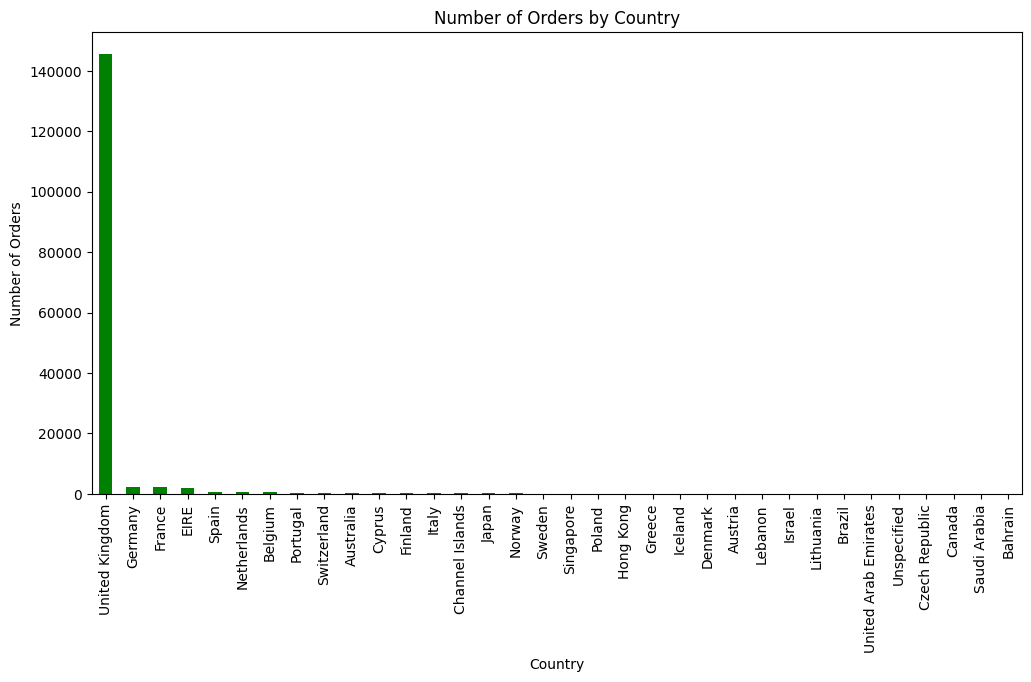

In [ ]:
import matplotlib.pyplot as plt

# Create a bar plot
df['Country'].value_counts().plot(kind='bar', figsize=(12, 6), color='green')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Add title and axis labels
plt.title('Number of Orders by Country')
plt.xlabel('Country')
plt.ylabel('Number of Orders')

# Display the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


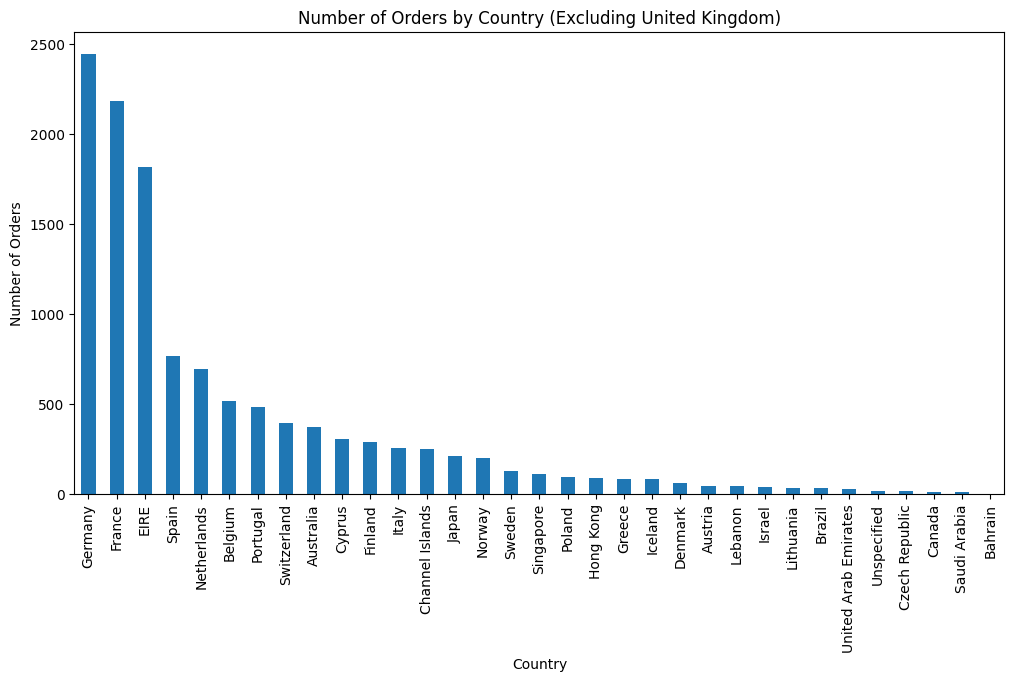

In [ ]:
import matplotlib.pyplot as plt

# Filter out United Kingdom from the DataFrame
df_filtered = df[df['Country'] != 'United Kingdom']
# Create a bar plot
df_filtered['Country'].value_counts().plot(kind='bar', figsize=(12, 6))

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Add title and axis labels
plt.title('Number of Orders by Country (Excluding United Kingdom)')
plt.xlabel('Country')
plt.ylabel('Number of Orders')

# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


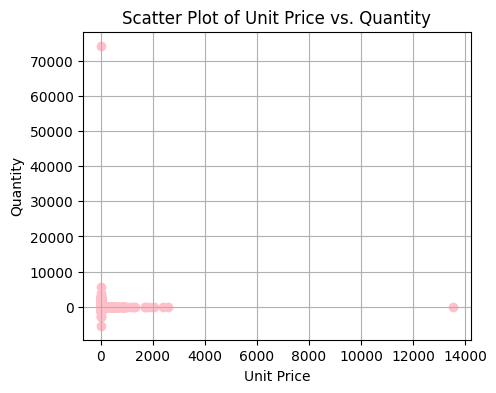

In [ ]:
# Plot scatter plot
plt.figure(figsize=(5, 4))
plt.scatter(df['UnitPrice'], df['Quantity'],color='pink')
plt.title('Scatter Plot of Unit Price vs. Quantity')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()

In [ ]:
#Separating transactions for Germany
mybasket = (df[df['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#viewing transaction basket
mybasket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,10 COLOUR SPACEBOY PEN,12 IVORY ROSE PEG PLACE SETTINGS,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 RED ROSE PEG PLACE SETTINGS,...,WRAP MONSTER FUN,WRAP PINK FAIRY CAKES,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,WRAP WEDDING DAY,"WRAP, BILLBOARD FONTS DESIGN",YELLOW COAT RACK PARIS FASHION,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#converting all positive vaues to 1 and everything else to 0
def my_encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

my_basket_sets = mybasket.applymap(my_encode_units)
my_basket_sets.drop('POSTAGE', inplace=True, axis=1) #Remove "postage" as an item

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Training the Model

In [ ]:
#Generatig frequent itemsets
my_frequent_itemsets = apriori(my_basket_sets, min_support=0.07, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
#generating rules
my_rules = association_rules(my_frequent_itemsets, metric="lift", min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#viewing top 100 rules
my_rules.head(100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(JAM JAR WITH PINK LID),(JAM JAR WITH GREEN LID),0.110236,0.070866,0.070866,0.642857,9.071429,0.063054,2.601575,1.000000
1,(JAM JAR WITH GREEN LID),(JAM JAR WITH PINK LID),0.070866,0.110236,0.070866,1.000000,9.071429,0.063054,inf,0.957627
2,(JAM JAR WITH PINK LID),(JAM MAKING SET PRINTED),0.110236,0.133858,0.070866,0.642857,4.802521,0.056110,2.425197,0.889872
3,(JAM MAKING SET PRINTED),(JAM JAR WITH PINK LID),0.133858,0.110236,0.070866,0.529412,4.802521,0.056110,1.890748,0.914141
4,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN STRONGMAN),0.133858,0.094488,0.070866,0.529412,5.602941,0.058218,1.924213,0.948485
5,(PLASTERS IN TIN STRONGMAN),(PLASTERS IN TIN CIRCUS PARADE),0.094488,0.133858,0.070866,0.750000,5.602941,0.058218,3.464567,0.907246
6,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.133858,0.141732,0.070866,0.529412,3.735294,0.051894,1.823819,0.845455
7,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.141732,0.133858,0.070866,0.500000,3.735294,0.051894,1.732283,0.853211
8,(PLASTERS IN TIN CIRCUS PARADE),(ROUND SNACK BOXES SET OF 4 FRUITS),0.133858,0.181102,0.078740,0.588235,3.248082,0.054498,1.988751,0.799091
9,(ROUND SNACK BOXES SET OF 4 FRUITS),(PLASTERS IN TIN CIRCUS PARADE),0.181102,0.133858,0.078740,0.434783,3.248082,0.054498,1.532405,0.845192


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


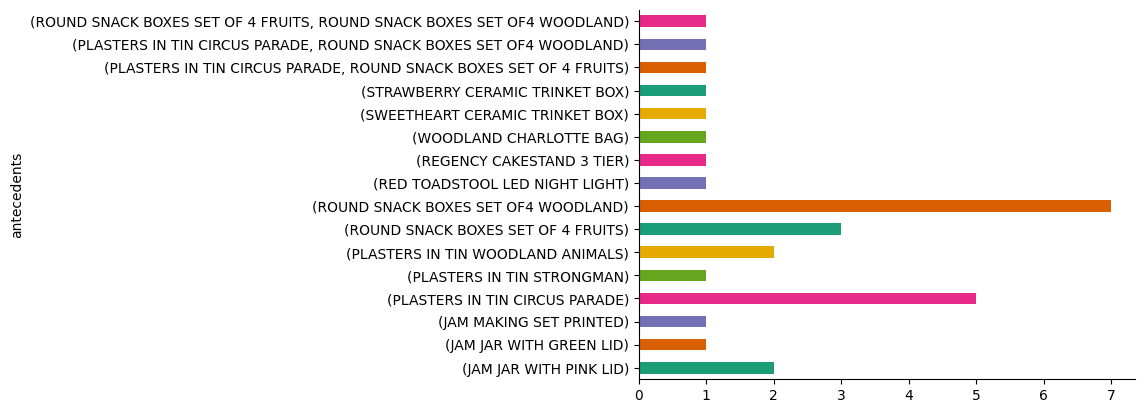

In [ ]:
# @title antecedents

from matplotlib import pyplot as plt
import seaborn as sns
my_rules.groupby('antecedents').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


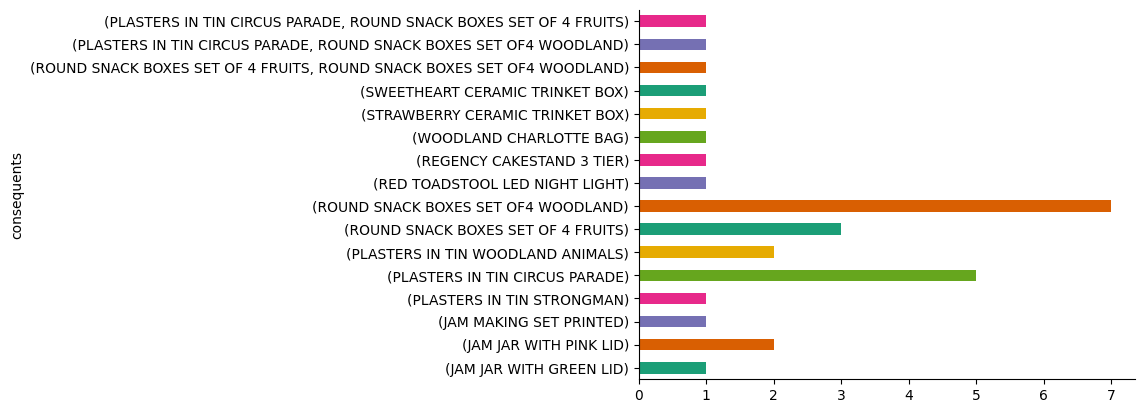

In [ ]:
# @title consequents

from matplotlib import pyplot as plt
import seaborn as sns
my_rules.groupby('consequents').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


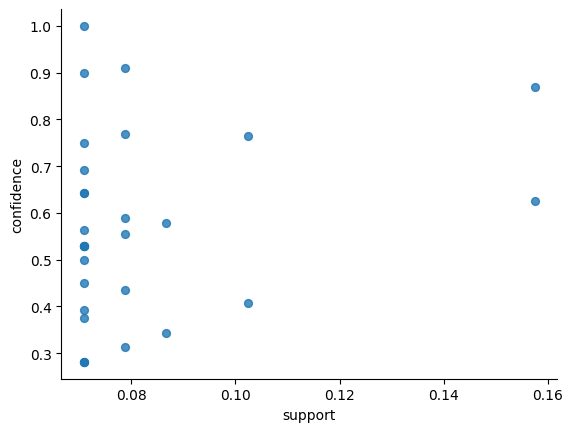

In [ ]:
# @title support vs confidence

from matplotlib import pyplot as plt
my_rules.plot(kind='scatter', x='support', y='confidence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Making Recommendation

In [ ]:
my_basket_sets['ROUND SNACK BOXES SET OF4 WOODLAND'].sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


32

In [ ]:
my_basket_sets['SPACEBOY LUNCH BOX'].sum()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


10

In [ ]:
#Filtering rules based on condition
my_rules[ (my_rules['lift'] >= 3) &
       (my_rules['confidence'] >= 0.3) ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(JAM JAR WITH PINK LID),(JAM JAR WITH GREEN LID),0.110236,0.070866,0.070866,0.642857,9.071429,0.063054,2.601575,1.000000
1,(JAM JAR WITH GREEN LID),(JAM JAR WITH PINK LID),0.070866,0.110236,0.070866,1.000000,9.071429,0.063054,inf,0.957627
2,(JAM JAR WITH PINK LID),(JAM MAKING SET PRINTED),0.110236,0.133858,0.070866,0.642857,4.802521,0.056110,2.425197,0.889872
3,(JAM MAKING SET PRINTED),(JAM JAR WITH PINK LID),0.133858,0.110236,0.070866,0.529412,4.802521,0.056110,1.890748,0.914141
4,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN STRONGMAN),0.133858,0.094488,0.070866,0.529412,5.602941,0.058218,1.924213,0.948485
5,(PLASTERS IN TIN STRONGMAN),(PLASTERS IN TIN CIRCUS PARADE),0.094488,0.133858,0.070866,0.750000,5.602941,0.058218,3.464567,0.907246
6,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.133858,0.141732,0.070866,0.529412,3.735294,0.051894,1.823819,0.845455
7,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.141732,0.133858,0.070866,0.500000,3.735294,0.051894,1.732283,0.853211
8,(PLASTERS IN TIN CIRCUS PARADE),(ROUND SNACK BOXES SET OF 4 FRUITS),0.133858,0.181102,0.078740,0.588235,3.248082,0.054498,1.988751,0.799091
9,(ROUND SNACK BOXES SET OF 4 FRUITS),(PLASTERS IN TIN CIRCUS PARADE),0.181102,0.133858,0.078740,0.434783,3.248082,0.054498,1.532405,0.845192


In [ ]:
# Evaluate the quality of association rules
def evaluate_rules(my_rules):
    # Filter rules with lift greater than 1 (indicating positive association)
    relevant_rules = my_rules[my_rules['lift'] > 1]

    # Calculate the average lift value of relevant rules
    avg_lift = relevant_rules['lift'].mean()

    # Print the average lift value
    print("Average Lift:", avg_lift)

    # Optionally, you can also print or visualize other metrics such as support, confidence, etc.
    print(relevant_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Call the function to evaluate rules
evaluate_rules(my_rules)


Average Lift: 4.0538028539294375
                                          antecedents  \
0                             (JAM JAR WITH PINK LID)   
1                            (JAM JAR WITH GREEN LID)   
2                             (JAM JAR WITH PINK LID)   
3                            (JAM MAKING SET PRINTED)   
4                     (PLASTERS IN TIN CIRCUS PARADE)   
5                         (PLASTERS IN TIN STRONGMAN)   
6                     (PLASTERS IN TIN CIRCUS PARADE)   
7                  (PLASTERS IN TIN WOODLAND ANIMALS)   
8                     (PLASTERS IN TIN CIRCUS PARADE)   
9                 (ROUND SNACK BOXES SET OF 4 FRUITS)   
10                    (PLASTERS IN TIN CIRCUS PARADE)   
11               (ROUND SNACK BOXES SET OF4 WOODLAND)   
12                 (PLASTERS IN TIN WOODLAND ANIMALS)   
13               (ROUND SNACK BOXES SET OF4 WOODLAND)   
14                    (RED TOADSTOOL LED NIGHT LIGHT)   
15               (ROUND SNACK BOXES SET OF4 WOODLAND)  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Eclat(since eclat wasn't available, modification of apriori was used which is similar to eclat)


In [ ]:
import numpy as np
import pandas as pd

# Read the dataset
df = pd.read_csv('Online_Retail.csv', encoding='latin-1')

# Data preprocessing
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]

# Filter transactions for Germany
mybasket = (df[df['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

# Data encoding for Eclat
def my_encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

my_basket_sets = mybasket.applymap(my_encode_units)
my_basket_sets.drop('POSTAGE', inplace=True, axis=1) # Remove "POSTAGE" as an item

# Eclat algorithm implementation
def eclat(dataset, min_support=0.5, max_length=2):
    itemsets = {}
    transactions = dataset.values.tolist()
    num_transactions = len(transactions)

    def search(itemset, transaction_list, min_support, num_transactions):
        if len(itemset) >= max_length:
            return

        for item in transaction_list:
            new_itemset = itemset + [item]
            new_transaction_list = [t for t in transaction_list if item in t]
            support = len(new_transaction_list) / num_transactions
            if support >= min_support:
                itemsets[frozenset(new_itemset)] = support
                search(new_itemset, new_transaction_list, min_support, num_transactions)

    search([], dataset.columns.tolist(), min_support, num_transactions)
    return itemsets

# Generate frequent itemsets using Eclat
my_frequent_itemsets = eclat(my_basket_sets, min_support=0.07)

# Print frequent itemsets
for itemset, support in my_frequent_itemsets.items():
    print(itemset, support)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Evaluate the quality of frequent itemsets
def evaluate_frequent_itemsets(frequent_itemsets):
    # Print frequent itemsets along with their support values
    for itemset, support in frequent_itemsets.items():
        print("Itemset:", itemset)
        print("Support:", support)
        print()

# Evaluate the quality of association rules
def evaluate_association_rules(rules):
    # Print association rules along with their support, confidence, and lift values
    for idx, row in rules.iterrows():
        print("Rule:", row['antecedents'], "->", row['consequents'])
        print("Support:", row['support'])
        print("Confidence:", row['confidence'])
        print("Lift:", row['lift'])
        print()

# Call the evaluation functions
print("Frequent Itemsets:")
evaluate_frequent_itemsets(my_frequent_itemsets)
print("Association Rules:")
evaluate_association_rules(my_rules)


Frequent Itemsets:
Association Rules:
Rule: frozenset({'JAM JAR WITH PINK LID'}) -> frozenset({'JAM JAR WITH GREEN LID'})
Support: 0.07086614173228346
Confidence: 0.6428571428571429
Lift: 9.071428571428573

Rule: frozenset({'JAM JAR WITH GREEN LID'}) -> frozenset({'JAM JAR WITH PINK LID'})
Support: 0.07086614173228346
Confidence: 1.0
Lift: 9.071428571428571

Rule: frozenset({'JAM JAR WITH PINK LID'}) -> frozenset({'JAM MAKING SET PRINTED'})
Support: 0.07086614173228346
Confidence: 0.6428571428571429
Lift: 4.802521008403361

Rule: frozenset({'JAM MAKING SET PRINTED'}) -> frozenset({'JAM JAR WITH PINK LID'})
Support: 0.07086614173228346
Confidence: 0.5294117647058822
Lift: 4.80252100840336

Rule: frozenset({'PLASTERS IN TIN CIRCUS PARADE'}) -> frozenset({'PLASTERS IN TIN STRONGMAN'})
Support: 0.07086614173228346
Confidence: 0.5294117647058822
Lift: 5.602941176470587

Rule: frozenset({'PLASTERS IN TIN STRONGMAN'}) -> frozenset({'PLASTERS IN TIN CIRCUS PARADE'})
Support: 0.0708661417322834

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import time


# Function to measure runtime
def measure_runtime(func, *args):
    start_time = time.time()
    result = func(*args)
    end_time = time.time()
    runtime = end_time - start_time
    return result, runtime

# Generate frequent itemsets and measure runtime for Apriori
apriori_result, apriori_runtime = measure_runtime(apriori, my_basket_sets)
print("Apriori Runtime:", apriori_runtime)

# Generate frequent itemsets and measure runtime for Eclat
eclat_result, eclat_runtime = measure_runtime(eclat, my_basket_sets)
print("Eclat Runtime:", eclat_runtime)


Apriori Runtime: 0.017955541610717773
Eclat Runtime: 0.11571764945983887


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
